In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [2]:
import os
pastas = ['images','output_doitall', 'membros']
for element in pastas:
    os.mkdir(element)

In [3]:
#%matplotlib widget
%matplotlib inline

In [3]:
#from platform import python_version
#python_version()

In [4]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [5]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'NGC_2204'

## Getting RA&DEC from Bica 2019

In [6]:
df = pd.read_csv('../../Catalogues/aglomerados_projeto.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]

## Querying the data

In [7]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [8]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [9]:
query = """SELECT 
source_id, ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b,
ruwe, phot_g_n_obs, phot_bp_n_obs, phot_rp_n_obs
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.35))'

In [10]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [11]:
data = job.get_results()
len(data)

9700

## Converting to pandas

In [12]:
df = data.to_pandas()
df

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b,ruwe,phot_g_n_obs,phot_bp_n_obs,phot_rp_n_obs
0,2942680732434163584,93.567740,-18.779346,1.317668,0.407422,0.015746,0.569119,1.283777,20.163006,0.360579,0.539227,NaN,NaN,225.995615,-16.429863,1.022146,365,38,41
1,2942680693778011264,93.559845,-18.793170,1.000057,0.208822,-3.226432,0.269704,1.421581,19.111525,0.220736,0.239797,NaN,NaN,226.005683,-16.442262,1.066453,370,37,34
2,2942680693778012032,93.554090,-18.790146,1.398235,0.543005,3.209505,0.802176,1.739492,20.417990,0.109386,0.717593,NaN,NaN,226.000512,-16.446036,0.966182,305,29,31
3,2942680693778012288,93.560162,-18.789959,-1.379034,0.110992,0.212943,0.140348,0.966436,18.261921,-0.079836,0.128956,NaN,NaN,226.002742,-16.440697,1.052177,421,47,46
4,2942680698074437632,93.559467,-18.786483,-0.040739,0.892188,-0.846313,1.234887,1.303976,20.713573,1.552924,1.192268,NaN,NaN,225.999148,-16.439903,1.141800,219,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,2941973505937333632,94.044058,-18.366927,NaN,NaN,NaN,NaN,0.960649,21.016005,NaN,NaN,NaN,NaN,225.792454,-15.850324,NaN,48,4,6
9696,2941973505941018752,94.056602,-18.371142,-5.513131,0.029571,1.435346,0.034294,1.241587,16.071917,0.996251,0.035750,NaN,NaN,225.801475,-15.841148,1.031945,477,52,51
9697,2941973505942041088,94.049862,-18.373251,3.232583,0.061749,2.889173,0.071440,1.062103,17.494009,0.462117,0.075723,NaN,NaN,225.800785,-15.847850,0.935432,473,48,47
9698,2941973536003136384,94.064053,-18.360030,-0.354816,0.335307,1.332676,0.364982,1.078289,19.895267,0.016301,0.367650,NaN,NaN,225.793894,-15.830180,1.024098,419,46,47


In [14]:
#import plotly.express as px

In [15]:
#fig = px.scatter(x = df.pmra_error, y = df.pmra)
#fig.show()

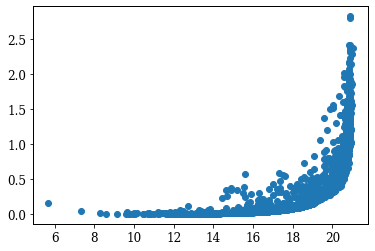

In [13]:
fig, ax = plt.subplots()

ax.scatter(df.phot_g_mean_mag, df.pmra_error)

## Applying better conditions to the variables

In [14]:
condicao = np.abs(0.5*df.pmra) < df.pmra_error
condicao2 = np.abs(0.5*df.pmdec) < df.pmdec_error
condicao3 = np.abs(0.5*df.parallax) < df.parallax_error


df_condicionado = df.drop(df[condicao|condicao2|condicao3].index) #
len(df_condicionado),len(df)

(4377, 9700)

## Dropping uknown values of pmra, pmdec or parallax.

In [15]:
ndf = df_condicionado.dropna(how='any',subset=['pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax', 'parallax_error'])
ndf

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b,ruwe,phot_g_n_obs,phot_bp_n_obs,phot_rp_n_obs
8,2942680762497492608,93.547965,-18.773174,0.205170,0.099532,-4.949894,0.118854,1.585913,18.014904,0.775629,0.119233,NaN,NaN,225.981879,-16.444527,0.989899,391,39,41
9,2942680766795842432,93.550893,-18.782590,-3.022156,0.049259,3.670635,0.059930,1.410732,16.773609,0.922288,0.057727,NaN,NaN,225.992030,-16.445772,1.049668,390,41,37
16,2942680831216970624,93.583062,-18.770402,-4.313987,0.064433,6.183289,0.083671,1.330805,17.357119,0.749229,0.076745,NaN,NaN,225.993155,-16.412985,0.937045,402,43,43
17,2942680831216972032,93.585577,-18.767200,44.564159,0.491383,-6.271707,0.640736,1.597891,20.225103,1.580390,0.610261,NaN,NaN,225.991096,-16.409517,0.964257,335,29,35
20,2942680835513477376,93.583366,-18.770823,1.232461,0.386495,9.081256,0.535122,NaN,19.926123,1.177294,0.495154,NaN,NaN,225.993678,-16.412890,1.057201,323,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,2941973437221542144,94.064721,-18.378261,-1.866762,0.018266,4.922228,0.021867,0.769077,14.639140,0.576851,0.022329,NaN,NaN,225.811485,-15.836988,1.138925,440,48,48
9693,2941973501643393792,94.047867,-18.364605,-3.335371,0.218946,-2.085178,0.237083,2.270765,19.323795,0.603753,0.249202,NaN,NaN,225.791770,-15.846078,0.991286,434,39,44
9696,2941973505941018752,94.056602,-18.371142,-5.513131,0.029571,1.435346,0.034294,1.241587,16.071917,0.996251,0.035750,NaN,NaN,225.801475,-15.841148,1.031945,477,52,51
9697,2941973505942041088,94.049862,-18.373251,3.232583,0.061749,2.889173,0.071440,1.062103,17.494009,0.462117,0.075723,NaN,NaN,225.800785,-15.847850,0.935432,473,48,47


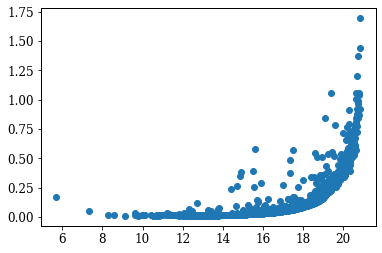

In [16]:
fig, ax = plt.subplots()

ax.scatter(ndf.phot_g_mean_mag, ndf.pmra_error)

## Determining the background

In [17]:
#.Definicão da função de correção de area
#.(calcula a parte da area de um círculo que esta fora das bordas da imagem)
def area_cor( radata, dedata, ap ):

    cosd = np.cos(dedata*np.pi/180.0)
    rarg = [min(radata),max(radata)]
    derg = [min(dedata),max(dedata)]
    
    b = np.array([(rarg[1]-radata)*cosd, (radata-rarg[0])*cosd, ap])
    c = np.array([ derg[1]-dedata, dedata-derg[0], ap ])
    b = np.min(b,axis=0)  ;  c = np.min(c,axis=0)
    P = 0.5*np.pi*ap**2 - c*np.sqrt(ap**2-c**2) - np.arcsin(c/ap)*ap**2
    Q = 0.5*np.pi*ap**2 - b*np.sqrt(ap**2-b**2) - np.arcsin(b/ap)*ap**2
    O = 0.5*( -c*np.sqrt(ap**2-c**2) - b*np.sqrt(ap**2-b**2) + \
     np.arccos(c/ap)*ap**2 - np.arcsin(b/ap)*ap**2) + c*b
    O = O*(abs(b) < np.sqrt(ap**2-c**2))
    area_cor = -P -Q +O
    return area_cor

0.0007210482457014507


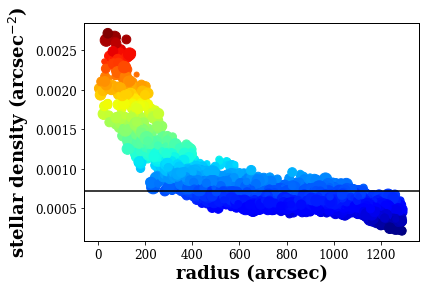

In [33]:
from astropy.coordinates import SkyCoord
from astropy import units
from sklearn.neighbors import NearestNeighbors


catalog = SkyCoord(ra=ndf['ra']*units.degree, dec=ndf['dec']*units.degree, frame='fk5')

nstar = len(ndf)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([ndf['ra'], ndf['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2 + area_cor(ndf.ra, ndf.dec, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(ndf['ra'], weights=den_data)
std_x = np.average((ndf['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(ndf['dec'], weights=den_data)
std_y = np.average((ndf['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')


norm_den = den_data/np.max(den_data)
bg_select = (norm_den > 0.24) & (norm_den < 0.3)
med_bg = np.median(den_data[bg_select])
std_bg = 0.5*med_bg

ax.axhline(med_bg, color = 'k')
print(med_bg)



In [34]:
raio_max = np.max(radii)*units.arcsec
raio_max = raio_max.to(units.radian).value
dens = med_bg
dens = dens*(1/units.arcsec*(1/units.arcsec))
dens = dens.to(1/units.sr).value
estrelas = len(df_condicionado) - dens*np.pi*raio_max**2
estrelas

558.9982495997324

## Creating the arrays to perform the 5-D HDBSCAN fit

In [35]:
cincoD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]
tresD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['parallax']))[0]

## Performing the HDBSCAN

In [36]:
import hdbscan

In [37]:
from sklearn.preprocessing import RobustScaler

scaled = RobustScaler().fit_transform(cincoD)
scl = RobustScaler().fit_transform(tresD)

Estimated no. of clusters: 1
Estimated no. of noise points: 2952
Estimated no. points clustered: 558


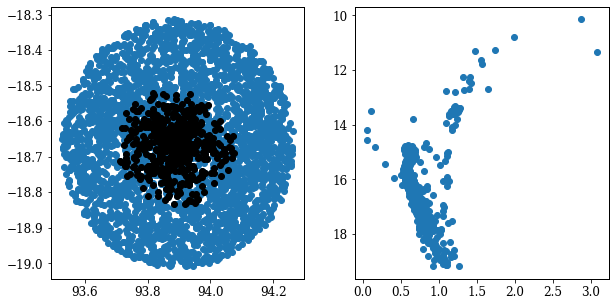

In [38]:
pts_expected = int(estrelas)

clusterer = hdbscan.HDBSCAN(min_cluster_size = pts_expected, min_samples = 400, allow_single_cluster=True, cluster_selection_method = 'eom', metric = 'euclidean').fit(scaled)


labels = clusterer.labels_


ndf = ndf.assign(labels=labels)
ndf = ndf.assign(prob=clusterer.probabilities_)


N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(clusterer.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(clusterer.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)

subset = ndf[ndf.labels == 0]


fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(subset.ra,subset.dec, color = 'k', zorder = 100)
ax[0].scatter(ndf.ra,ndf.dec)

ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


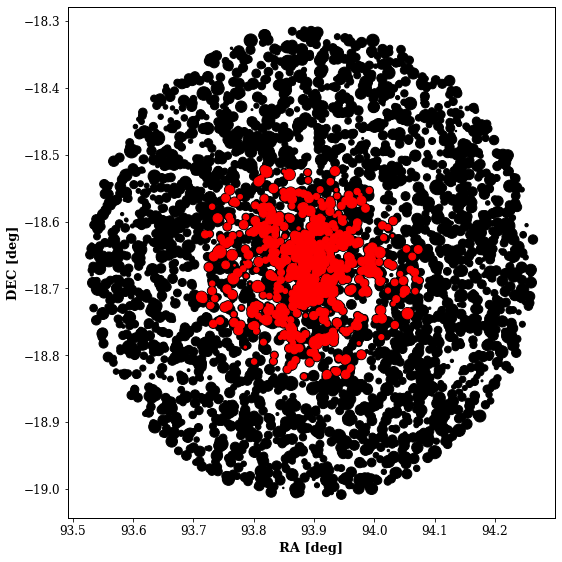

In [39]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(subset.ra,subset.dec,  s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, color = 'red', zorder = 100)
ax.scatter(ndf.ra,ndf.dec,  s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*20, color = 'k')
ax.set_xlabel('RA [deg]', fontweight = 'bold')
ax.set_ylabel('DEC [deg]', fontweight = 'bold')
plt.tight_layout()


## Parameters

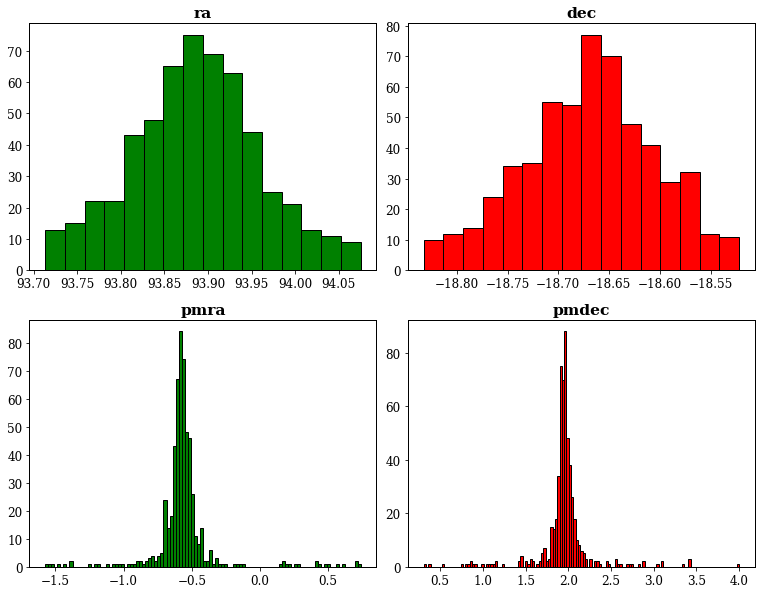

In [40]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


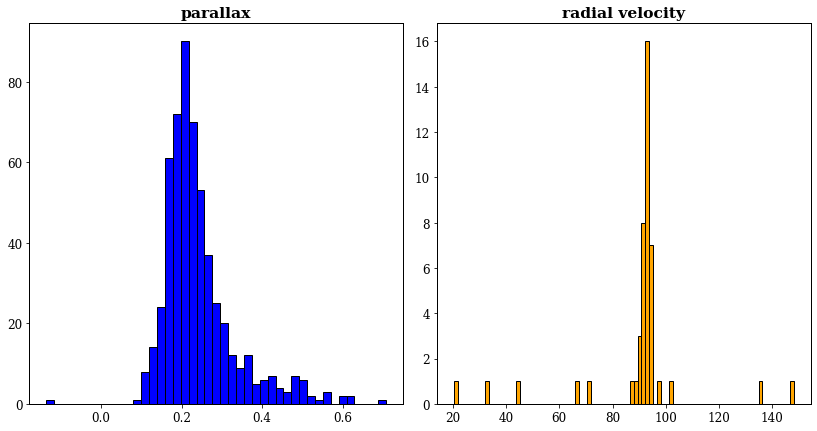

In [41]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Gaussian fit

In [42]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 43
    # variables        = 3
    chi-square         = 947.091439
    reduced chi-square = 23.6772860
    Akaike info crit   = 138.964408
    Bayesian info crit = 144.248008
[[Variables]]
    amplitude:  9.69997727 +/- 0.34788278 (3.59%) (init = 10.85808)
    center:     0.20863742 +/- 0.00197979 (0.95%) (init = 0.2056185)
    sigma:      0.04780755 +/- 0.00197983 (4.14%) (init = 0.04021512)
    fwhm:       0.11257817 +/- 0.00466214 (4.14%) == '2.3548200*sigma'
    height:     80.9439419 +/- 2.90299423 (3.59%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


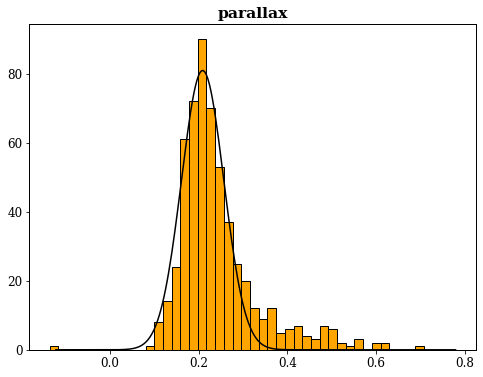

In [43]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0], histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(0.9*bins[0],1.1*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 16
    # variables        = 3
    chi-square         = 374.039485
    reduced chi-square = 28.7722681
    Akaike info crit   = 56.4283623
    Bayesian info crit = 58.7461285
[[Variables]]
    amplitude:  13.2102969 +/- 0.53069151 (4.02%) (init = 14.31493)
    center:     93.8862472 +/- 0.00348089 (0.00%) (init = 93.88212)
    sigma:      0.07537225 +/- 0.00352646 (4.68%) (init = 0.07229763)
    fwhm:       0.17748808 +/- 0.00830417 (4.68%) == '2.3548200*sigma'
    height:     69.9215725 +/- 2.80079367 (4.01%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.585


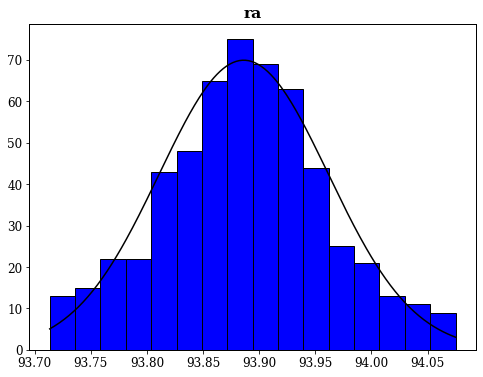

In [44]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 104
    # variables        = 3
    chi-square         = 1019.08425
    reduced chi-square = 10.0899430
    Akaike info crit   = 243.355956
    Bayesian info crit = 251.289129
[[Variables]]
    amplitude:  10.3344162 +/- 0.25628234 (2.48%) (init = 14.14241)
    center:    -0.57836716 +/- 0.00156158 (0.27%) (init = -0.5753538)
    sigma:      0.05453263 +/- 0.00156156 (2.86%) (init = 0.05612066)
    fwhm:       0.12841452 +/- 0.00367720 (2.86%) == '2.3548200*sigma'
    height:     75.6031035 +/- 1.87487675 (2.48%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


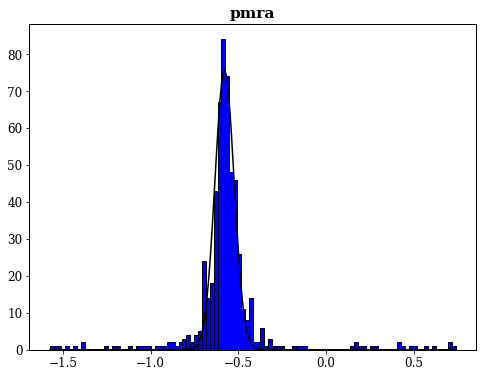

In [45]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 16
    # variables        = 3
    chi-square         = 582.104657
    reduced chi-square = 44.7772813
    Akaike info crit   = 63.5049845
    Bayesian info crit = 65.8227507
[[Variables]]
    amplitude:  11.6441414 +/- 0.60698369 (5.21%) (init = 8.328506)
    center:    -18.6655787 +/- 0.00426667 (0.02%) (init = -18.66696)
    sigma:      0.07173960 +/- 0.00441597 (6.16%) (init = 0.04143535)
    fwhm:       0.16893386 +/- 0.01039880 (6.16%) == '2.3548200*sigma'
    height:     64.7528043 +/- 3.34104068 (5.16%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.599


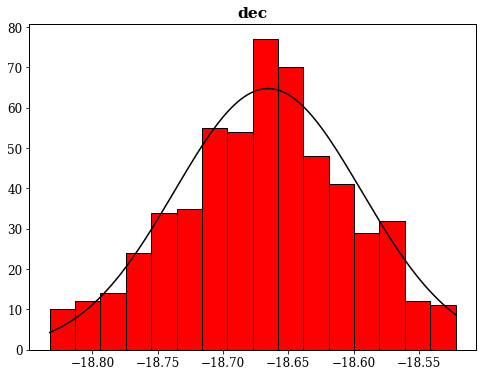

In [46]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 137
    # variables        = 3
    chi-square         = 1192.09395
    reduced chi-square = 8.89622350
    Akaike info crit   = 302.397546
    Bayesian info crit = 311.157488
[[Variables]]
    amplitude:  12.0421395 +/- 0.28294553 (2.35%) (init = 10.74443)
    center:     1.94873351 +/- 0.00169237 (0.09%) (init = 1.950088)
    sigma:      0.06237914 +/- 0.00169242 (2.71%) (init = 0.04069858)
    fwhm:       0.14689164 +/- 0.00398533 (2.71%) == '2.3548200*sigma'
    height:     77.0148324 +/- 1.80955959 (2.35%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


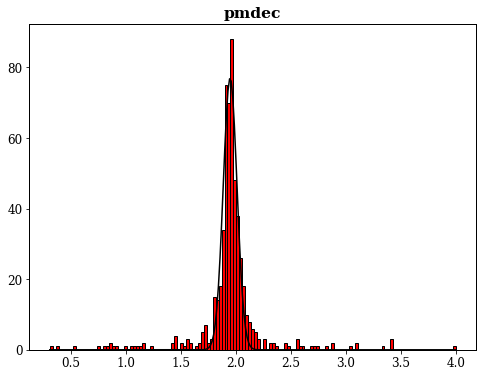

In [47]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 51
    # data points      = 87
    # variables        = 3
    chi-square         = 15.3184111
    reduced chi-square = 0.18236204
    Akaike info crit   = -145.106182
    Bayesian info crit = -137.708458
[[Variables]]
    amplitude:  49.7324673 +/- 1.33284766 (2.68%) (init = 1020.328)
    center:     93.0222167 +/- 0.03980579 (0.04%) (init = 93.13386)
    sigma:      1.26077823 +/- 0.03750453 (2.97%) (init = 21.25684)
    fwhm:       2.96890579 +/- 0.08831643 (2.97%) == '2.3548200*sigma'
    height:     15.7366176 +/- 0.41648693 (2.65%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.566


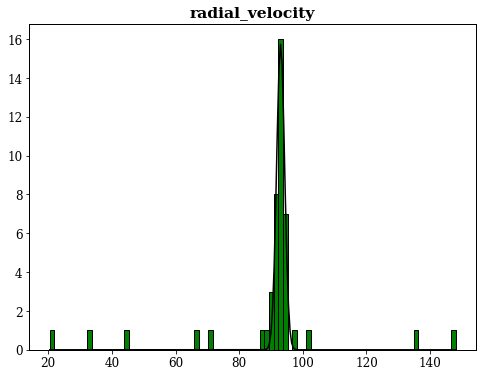

In [48]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()

## Sigma Clipping

558
311
285


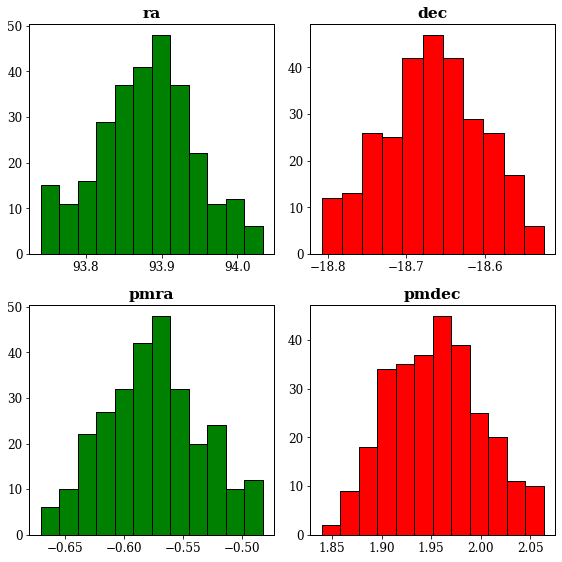

In [49]:
gmodel = GaussianModel()
clip_loop = subset

for i in range(2):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 2

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]
    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]
    dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]
    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down) & (clip_loop.ra>ra_down) & (clip_loop.ra<ra_up) & 
                              (clip_loop.dec>dec_down) & (clip_loop.dec<dec_up) & (clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) 
                              & (clip_loop.pmdec<pmdec_up)  & (clip_loop.radial_velocity.isnull() | (clip_loop.radial_velocity>radvel_down) & (clip_loop.radial_velocity<radvel_up)) ]

    
print(len(clip_loop))

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax1.hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax2.hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax3.hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax4.hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.tight_layout()


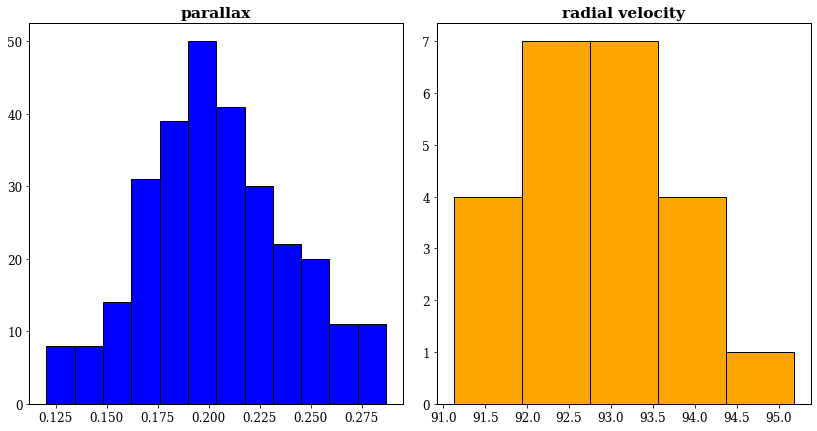

In [50]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(clip_loop['parallax'], bins = 'fd')
ax1.hist(clip_loop['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## FINAL RESULTS

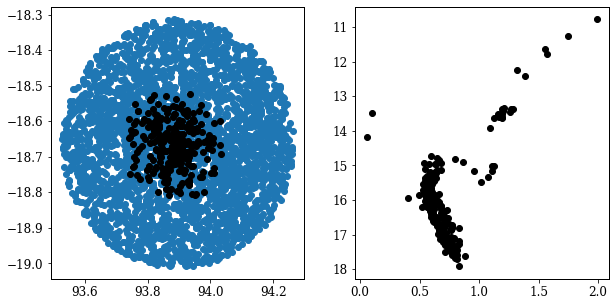

In [51]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(clip_loop.ra,clip_loop.dec, color = 'k', zorder = 100)
ax[0].scatter(ndf.ra,ndf.dec)


ax[1].scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'], color = 'k')
ax[1].invert_yaxis()

In [52]:
from astropy.coordinates import Distance

teste =  Distance(parallax=clip_loop['parallax'].to_numpy()*units.mas)

np.min(teste), np.max(teste)

(<Distance 3484.82523738 pc>, <Distance 8302.98980449 pc>)

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

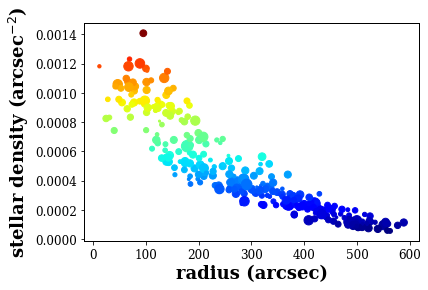

In [53]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



In [54]:
clip_loop.to_csv('membros/final_5d.csv', index=False)

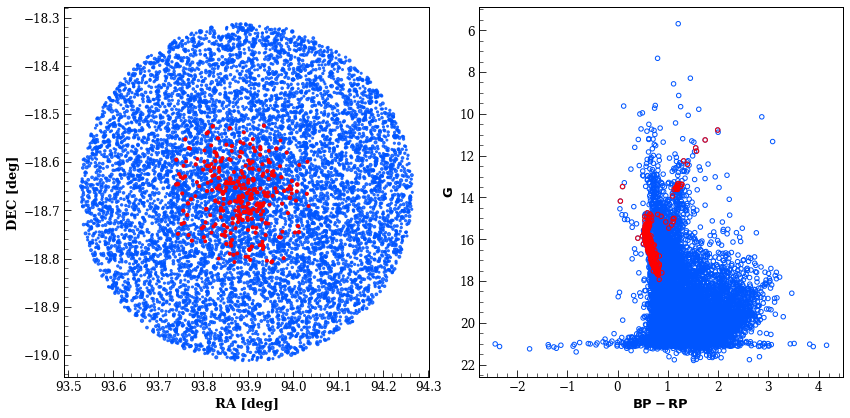

In [55]:
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))


ax1.scatter(df['ra'],df['dec'], color = '#0055FF',s=(25-df.phot_g_mean_mag), alpha = 0.8)
ax1.scatter(clip_loop['ra'],clip_loop['dec'], color = 'red', s=(25-clip_loop.phot_g_mean_mag), zorder = 10)
ax1.set_ylabel('DEC [deg]', fontweight = 'bold')
ax1.set_xlabel('RA [deg]', fontweight = 'bold')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax1.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)




ax2.scatter(df['bp_rp'],df['phot_g_mean_mag'], color = 'None', edgecolor = '#0055FF', s = 20)
ax2.scatter(clip_loop['bp_rp'], clip_loop['phot_g_mean_mag'], color = 'None', edgecolor = 'red', s =20)
ax2.set_xlabel('BP - RP', fontweight = 'bold')
ax2.set_ylabel('G', fontweight = 'bold')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')
#ax2.grid()

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
#plt.savefig('teste.jpg', format = 'jpg', dpi = 300)

## PARAMETERS

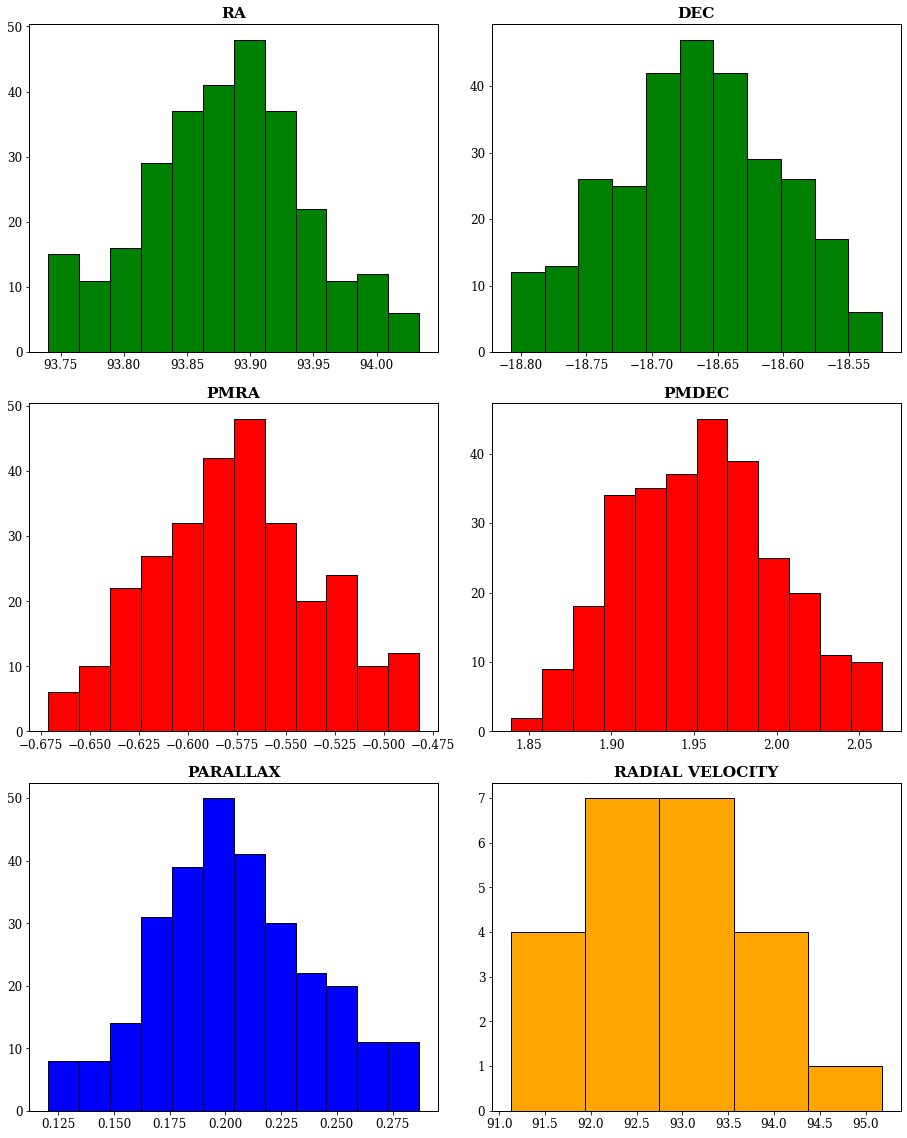

In [57]:
fig, ax = plt.subplots(3,2, figsize=(12.8,16))


optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax[0,0].hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');
ax[0,0].set_title('RA', fontweight = 'bold')


optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax[1,0].hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'red');
ax[1,0].set_title('PMRA', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax[0,1].hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'green');
ax[0,1].set_title('DEC', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax[1,1].hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');
ax[1,1].set_title('PMDEC', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['parallax'], bins = 'fd')
ax[2,0].hist(clip_loop['parallax'], optimal_bin, ec = 'k',color = 'blue');
ax[2,0].set_title('PARALLAX', fontweight = 'bold')

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax[2,1].hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');
ax[2,1].set_title('RADIAL VELOCITY', fontweight = 'bold')
plt.tight_layout()
#plt.savefig('params_ngc2420.png', format = 'png', dpi = 300)


In [58]:
for i in range(1):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


285


In [59]:
valores_ra, valores_dec

([93.88177693142173, 0.0696153136696187],
 [-18.664329318095255, 0.0770274064704024])

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 5
    # variables        = 3
    chi-square         = 0.05797477
    reduced chi-square = 0.02898739
    Akaike info crit   = -16.2859262
    Bayesian info crit = -17.4576124
[[Variables]]
    amplitude:  25.0935188 +/- 0.50744406 (2.02%) (init = 12.15726)
    center:     92.6366326 +/- 0.02950075 (0.03%) (init = 92.14079)
    sigma:      1.32285841 +/- 0.03327821 (2.52%) (init = 0.6754036)
    fwhm:       3.11509343 +/- 0.07836420 (2.52%) == '2.3548200*sigma'
    height:     7.56760214 +/- 0.14221496 (1.88%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.677
    C(center, sigma)     = -0.173
    C(amplitude, center) = -0.141


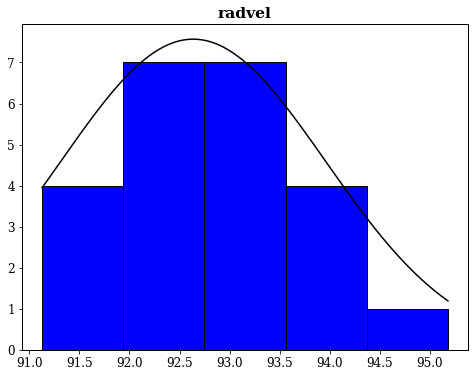

In [60]:
ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

fig, ax = plt.subplots(figsize=(8,6))


data = ra_vel['radial_velocity']

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue')

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radvel', fontweight = 'bold')

plt.show()

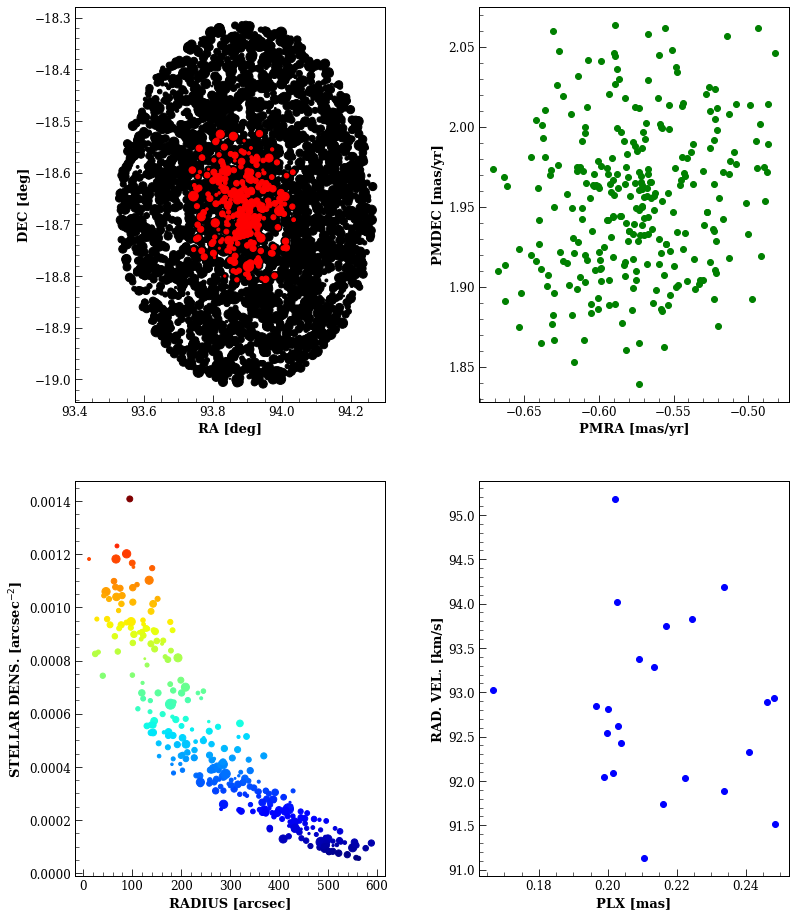

In [61]:
fig, ax = plt.subplots(2,2, figsize=(12.8,16))

ax[0,0].scatter(clip_loop.ra, clip_loop.dec, color = 'red', s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, zorder = 100)
ax[0,0].scatter(ndf.ra, ndf.dec, color = 'k', s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*15)
ax[0,0].set_xlabel('RA [deg]', fontweight = 'bold')
ax[0,0].set_ylabel('DEC [deg]', fontweight = 'bold')
#ax[0,0].set_xlim(114.4,114.8)
#ax[0,0].set_ylim(21.4,21.8)


ax[0,1].scatter(clip_loop.pmra, clip_loop.pmdec, color = 'green')
ax[0,1].set_xlabel('PMRA [mas/yr]', fontweight = 'bold')
ax[0,1].set_ylabel('PMDEC [mas/yr]', fontweight = 'bold')


ax[1,1].scatter(ra_vel.parallax, ra_vel.radial_velocity, color = 'blue')
ax[1,1].set_xlabel('PLX [mas]', fontweight = 'bold')
ax[1,1].set_ylabel('RAD. VEL. [km/s]', fontweight = 'bold')


ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[1,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)



from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')


ax[1,0].scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, c=den_data/3600**2, cmap = cor)
ax[1,0].set_xlabel('RADIUS [arcsec]', fontweight='bold')
ax[1,0].set_ylabel('STELLAR DENS. [arcsec$^{-2}$]', fontweight='bold')


ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


ax[0,0].set_xticks(ax[0,0].get_xticks()[::2])



plt.subplots_adjust(hspace=0.2, wspace = 0.3)
#plt.savefig('ngc2420_3plot.png', format = 'png', dpi = 300)


## Sigma Clippinh Only VPD and plx

In [62]:
gmodel = GaussianModel()
clip_loop = subset


print(len(clip_loop))

j = 4

for i in range(j):
    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]
    
    sigma = 2

    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]

    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]

    clip_loop = clip_loop.loc[(clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) 
                              & (clip_loop.pmdec<pmdec_up)]

    
print(len(clip_loop))

gmodel = GaussianModel()

for i in range(3):

    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 2

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down)]



for i in range(1):
    ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
    data = ra_vel['radial_velocity']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_radial_velocity = [result.params['center'].value, result.params['sigma'].value]
    
    sigma = 3
    
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.radial_velocity.isnull() | (clip_loop.radial_velocity>radvel_down) & (clip_loop.radial_velocity<radvel_up)) ]

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
print(len(clip_loop))




558
356
297


In [63]:
clip_loop.to_csv('membros/final_semradec.csv', index = False)

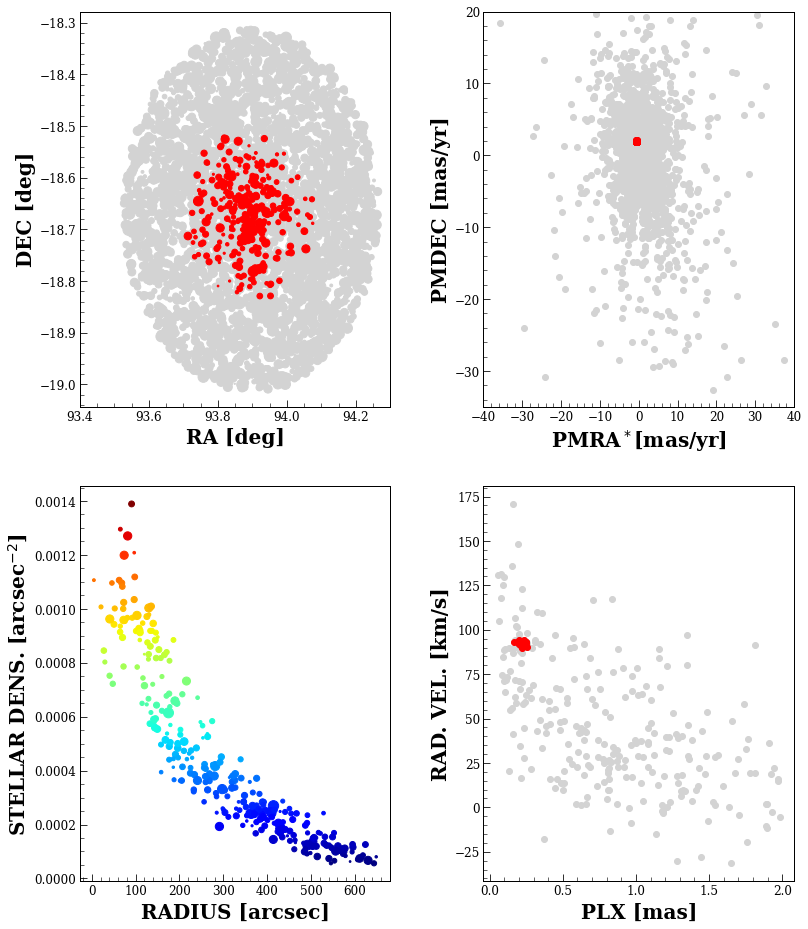

In [64]:
fig, ax = plt.subplots(2,2, figsize=(12.8,16))

ax[0,0].scatter(clip_loop.ra, clip_loop.dec, color = 'red', s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, zorder = 100)
ax[0,0].scatter(ndf.ra, ndf.dec, color = 'lightgray', s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*15)
ax[0,0].set_xlabel('RA [deg]', fontweight = 'bold', fontsize = 20)
ax[0,0].set_ylabel('DEC [deg]', fontweight = 'bold', fontsize = 20)
#ax[0,0].set_xlim(114.3,114.9)
#ax[0,0].set_ylim(21.3,21.9)


ax[0,1].scatter(clip_loop.pmra, clip_loop.pmdec, color = 'red', zorder= 100)
ax[0,1].scatter(ndf.pmra, ndf.pmdec, color = 'lightgray')
ax[0,1].set_xlabel('PMRA$^*$[mas/yr]', fontweight = 'bold', fontsize = 20)
ax[0,1].set_ylabel('PMDEC [mas/yr]', fontweight = 'bold',fontsize = 20)
ax[0,1].set_xlim(-40,40)
ax[0,1].set_ylim(-35,20)


ra_vel_ndf = ndf.dropna(how='any',subset=['radial_velocity'])
ra_vel_ndf = ra_vel_ndf.loc[ra_vel_ndf.parallax <2]

ax[1,1].scatter(ra_vel.parallax, ra_vel.radial_velocity, color = 'red', zorder= 100)
ax[1,1].scatter(ra_vel_ndf.parallax, ra_vel_ndf.radial_velocity, color = 'lightgray')
ax[1,1].set_xlabel('PLX [mas]', fontweight = 'bold',fontsize = 20)
ax[1,1].set_ylabel('RAD. VEL. [km/s]', fontweight = 'bold',fontsize = 20)


ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[1,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)



from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')


ax[1,0].scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, c=den_data/3600**2, cmap = cor)
ax[1,0].set_xlabel('RADIUS [arcsec]', fontweight='bold', fontsize = 20)
ax[1,0].set_ylabel('STELLAR DENS. [arcsec$^{-2}$]', fontweight='bold',fontsize = 20)


ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


ax[0,0].set_xticks(ax[0,0].get_xticks()[::2])



plt.subplots_adjust(hspace=0.2, wspace = 0.3)


In [65]:
for i in range(1):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


297


## Clipping redondo

In [66]:
gmodel = GaussianModel()

data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
numero, bins = np.histogram(data, optimal_bin)
teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
inicial = gmodel.guess(numero, x = teste)
result = gmodel.fit(numero, inicial, x=teste)
valores_pmra = [result.params['center'].value, result.params['sigma'].value]

gmodel = GaussianModel()

data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
numero, bins = np.histogram(data, optimal_bin)
teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
inicial = gmodel.guess(numero, x = teste)
result = gmodel.fit(numero, inicial, x=teste)
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

r1sigma = np.sqrt(valores_pmra[1]**2 + valores_pmdec[1]**2)

In [67]:
rs = np.zeros(len(subset))

for i in range(len(subset)):
    star = subset.iloc[i]
    distancia = np.sqrt((valores_pmra[0] - star.pmra)**2 + (valores_pmdec[0]-star.pmdec)**2)
    rs[i] = distancia


In [73]:
teste = subset.assign(rs=rs)
teste_final = teste.loc[rs<=r1sigma]

ra_vel = teste.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = np.histogram(data, optimal_bin);

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)





parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]



In [77]:
teste = subset.assign(rs=rs)
teste_final = teste.loc[rs<=r1sigma]
print(len(teste_final))
for i in range(1):
    data = teste_final['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 3

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    

    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    teste_final= teste_final.loc[(teste_final.parallax < paralaxe_up ) & (teste_final.parallax > paralaxe_down)  & (teste_final.radial_velocity.isnull() | (teste_final.radial_velocity>radvel_down) & (teste_final.radial_velocity<radvel_up)) ]
    
print(len(teste_final))


274
258


TypeError: Axis must be specified when shapes of a and weights differ.

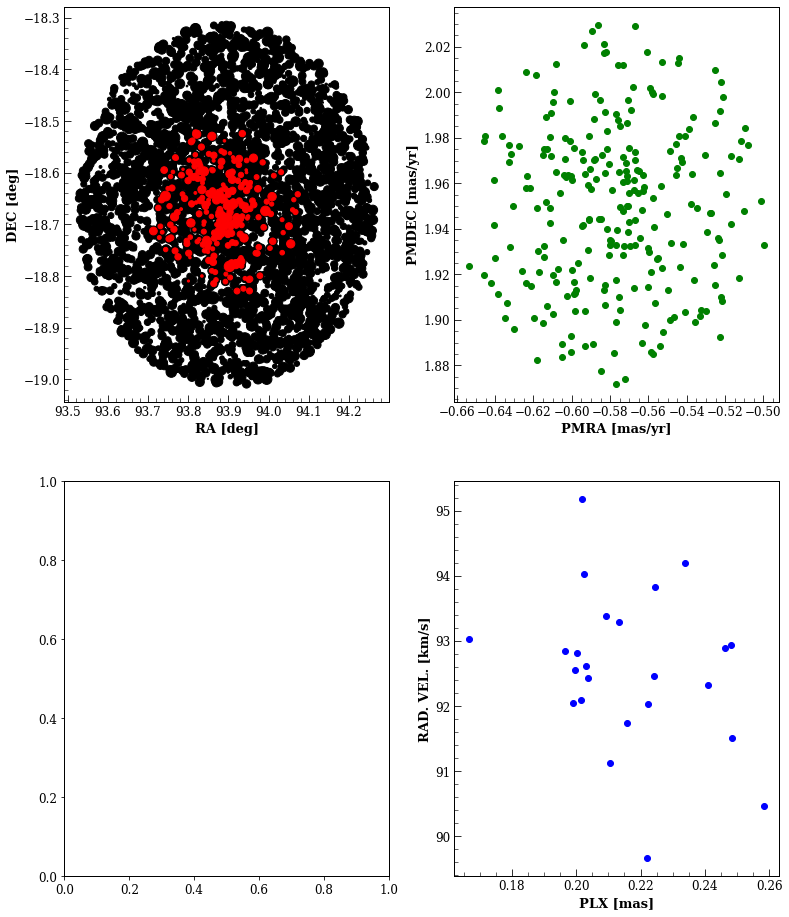

In [78]:
fig, ax = plt.subplots(2,2, figsize=(12.8,16))

ax[0,0].scatter(teste_final.ra, teste_final.dec, color = 'red', s=(max(teste_final['phot_g_mean_mag'])-teste_final['phot_g_mean_mag'])*15, zorder = 100)
ax[0,0].scatter(ndf.ra, ndf.dec, color = 'k', s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*15)
ax[0,0].set_xlabel('RA [deg]', fontweight = 'bold')
ax[0,0].set_ylabel('DEC [deg]', fontweight = 'bold')



ax[0,1].scatter(teste_final.pmra, teste_final.pmdec, color = 'green')
ax[0,1].set_xlabel('PMRA [mas/yr]', fontweight = 'bold')
ax[0,1].set_ylabel('PMDEC [mas/yr]', fontweight = 'bold')

ra_vel = teste_final.dropna(how='any',subset=['radial_velocity'])

ax[1,1].scatter(ra_vel.parallax, ra_vel.radial_velocity, color = 'blue')
ax[1,1].set_xlabel('PLX [mas]', fontweight = 'bold')
ax[1,1].set_ylabel('RAD. VEL. [km/s]', fontweight = 'bold')


ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[1,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=teste_final['ra']*units.degree, dec=teste_final['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([teste_final['ra']*np.cos(teste_final['dec']*np.pi/180.0), teste_final['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(teste_final['ra'], weights=den_data)
std_x = np.average((teste_final['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(teste_final['dec'], weights=den_data)
std_y = np.average((teste_final['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')


ax[1,0].scatter(radii,den_data, s=(max(teste_final['phot_g_mean_mag'])-teste_final['phot_g_mean_mag'])*15, c=den_data/3600**2, cmap = cor)
ax[1,0].set_xlabel('RADIUS [arcsec]', fontweight='bold')
ax[1,0].set_ylabel('STELLAR DENS. [arcsec$^{-2}$]', fontweight='bold')


ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


ax[0,0].set_xticks(ax[0,0].get_xticks()[::2])



plt.subplots_adjust(hspace=0.2, wspace = 0.3)





In [ ]:
teste_final.to_csv('membros/raio_vpd.csv', index = False)